## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [6]:
df = pd.read_csv('udemy_courses_dataset.csv')

## Understand the data

In [7]:
pd.set_option('display.max_rows',None)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [9]:
df.shape

(3678, 12)

In [10]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [11]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [12]:
df.duplicated().sum()

6

## Data Cleaning and Transformation

In [14]:
# dropping duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
# checking for null values
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [16]:
# Convert ['published_timestamp'] column dtype to DateTime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

## Analyze the Column

In [17]:
df.course_title.value_counts()

course_title
Acoustic Blues Guitar Lessons                                                                                                                                                                                                                             3
Creating an animated greeting card via Google Slides                                                                                                                                                                                                      3
Aprende a tocar el acordeón de botones                                                                                                                                                                                                                    2
Drum Lessons For Beginners                                                                                                                                                                                                             

In [27]:
df.is_paid.unique()

array([ True, False])

In [28]:
paid_or_free = df.is_paid.value_counts()
paid_or_free

is_paid
True     3362
False     310
Name: count, dtype: int64

In [29]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [30]:
course_level = df.level.value_counts()
course_level = df.groupby('level')['num_subscribers'].sum()
course_level

level
All Levels            6871791
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

In [31]:
df.content_duration.describe()

count    3672.000000
mean        4.097603
std         6.057830
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

In [32]:
df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [33]:
df['revenue'] = df['price'] * df['num_subscribers']
df.revenue

0         429400
1         209400
2          97830
3         232845
4         255200
5        1383150
6         100100
7         277115
8        1008540
9         165400
10        856800
11        276000
12        108210
13        791895
14         58800
15        170700
16         98380
17        533200
18        267700
19        769025
20        161800
21        459000
22        761175
23         95800
24        112815
25        867900
26       1066800
27        700875
28        431550
29        143640
30        110675
31        368600
32        395865
33        206000
34        208200
35       1537380
36       3295500
37       2288200
38       4340115
39       1672125
40       4773795
41        743145
42        973245
43        861235
44       4039000
45       1506300
46         34865
47       2120600
48        227430
49        433950
50        316000
51       1007475
52        374500
53        186570
54        222600
55        498840
56       1114400
57        207785
58         187

## Data Visulaization

In [34]:
# Top 5 most demand courses

top_courses = df[['course_title','num_subscribers']].sort_values(by='num_subscribers',ascending = False).head(5)
top_courses

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512


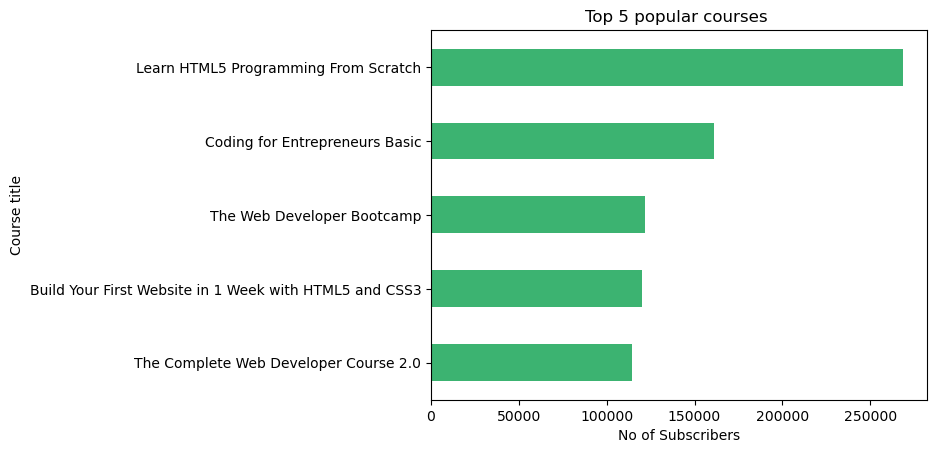

In [35]:
# Bar Chart for top 5 most demand course

top_courses.plot(kind='barh',
                 x='course_title',
                 y='num_subscribers',
                 color='mediumseagreen')
plt.title('Top 5 popular courses ')
plt.ylabel('Course title')
plt.xlabel('No of Subscribers')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

In [38]:
# Number of Subscribers and Average Sales per year

df['year'] = df['published_timestamp'].dt.year
avg_revenue = df.groupby('year')['num_subscribers'].mean()
no_of_courses = df.groupby('year')['course_title'].count()

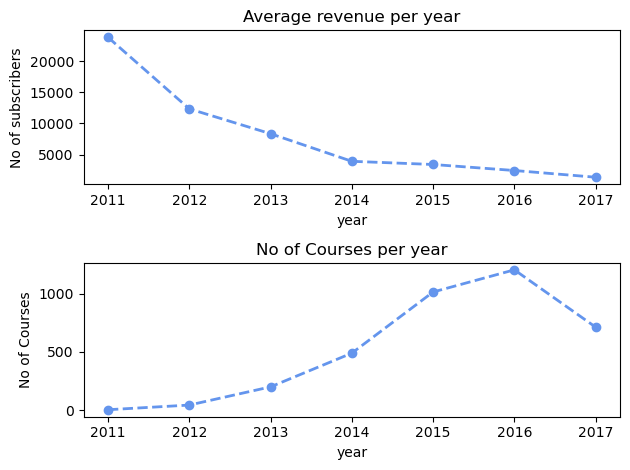

In [39]:
# Line Chart for Number of Subscribers and Average Sales per year
fig,ax = plt.subplots(2,1)
avg_revenue.plot(kind='line',
               ax=ax[0],
               linestyle='--',
               color='cornflowerblue',
               linewidth=2, 
               marker='o')
ax[0].set_title('Average revenue per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('No of subscribers')

no_of_courses.plot(kind='line',
                   ax=ax[1],
                   linestyle='--', 
                   color='cornflowerblue',
                   linewidth=2,
                   marker='o')
ax[1].set_title('No of Courses per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('No of Courses')

plt.tight_layout()
plt.show()


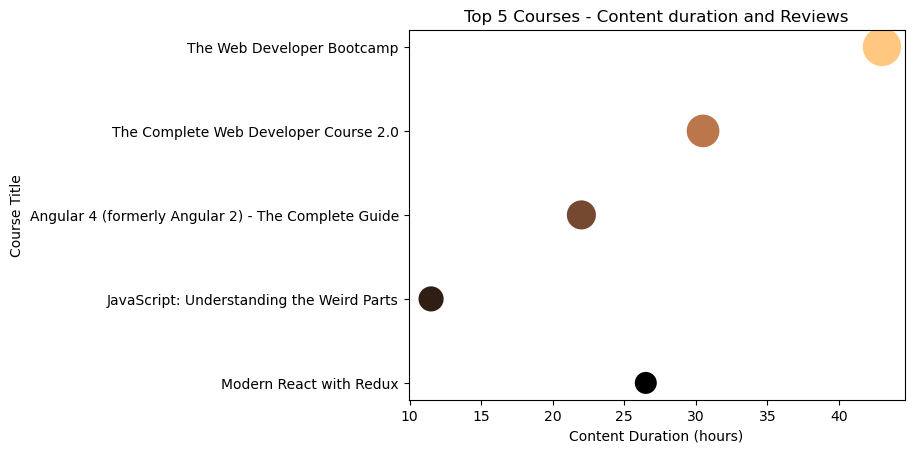

In [40]:
# Scatterplot for No of Reviews and the Content duration
course_by_review = df.sort_values(by='num_reviews',ascending=False).head(5)
sns.scatterplot(data=course_by_review
                ,x='content_duration',
                y='course_title',
                size='num_reviews',
                sizes=(300,850),
                hue='num_reviews',
                palette='copper')
plt.title('Top 5 Courses - Content duration and Reviews')
plt.xlabel('Content Duration (hours)')
plt.ylabel('Course Title')
plt.legend().set_visible(False)
plt.show()

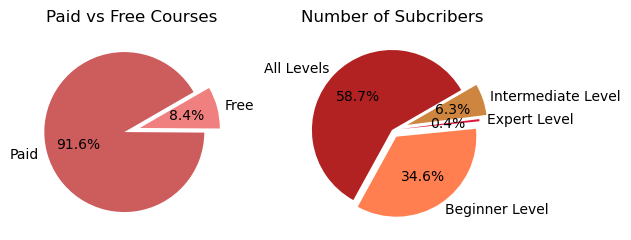

In [44]:
# Piechart for Paid vs Free courses and Number of Subscribers per level

fig,ax=plt.subplots(1,2)
ax[0].pie(paid_or_free,
        labels=['Paid','Free'],
        autopct='%1.1f%%',
        colors=['indianred','lightcoral'],
        startangle=30,
        explode=[0.1,0.1])
ax[0].set_title('Paid vs Free Courses')

ax[1].pie(course_level,
        labels=course_level.index,
        autopct='%1.1f%%',
        colors=['firebrick','coral','crimson','peru'],  
        startangle=30,
        explode = [0, 0.1, 0.1, 0.2])
ax[1].set_title('Number of Subcribers')
plt.tight_layout()
plt.show()

In [51]:
# correlation analysis
num_corr = df[['price','num_reviews','num_subscribers','revenue']].corr()
num_corr

,price,num_reviews,num_subscribers,revenue
price,1.000000,0.113568,0.050436,0.346828
num_reviews,0.113568,1.000000,0.651070,0.770577
num_subscribers,0.050436,0.651070,1.000000,0.555712
revenue,0.346828,0.770577,0.555712,1.000000


Text(0.5, 1.0, 'Correlation Heatmap: Price, Subscribers, Reviews, Revenue')

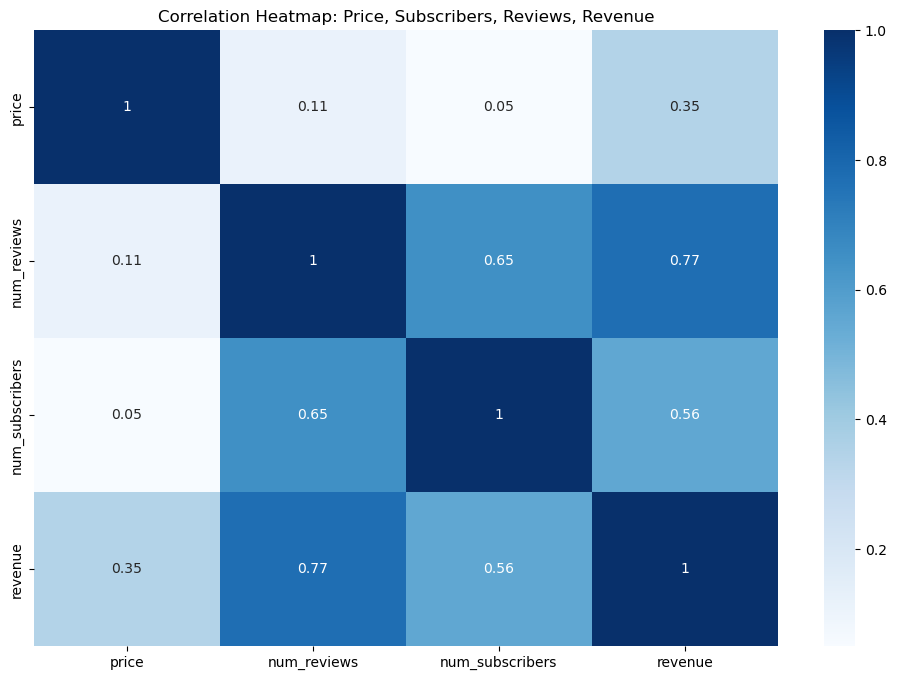

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(num_corr,annot=True,cmap='Blues')
plt.title("Correlation Heatmap: Price, Subscribers, Reviews, Revenue" )

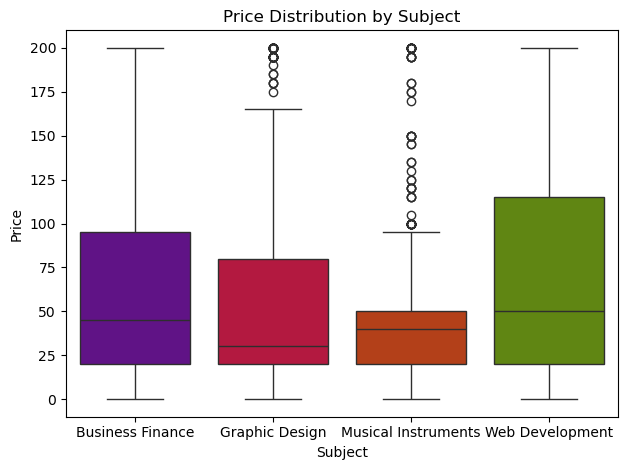

In [50]:
# Identify outliers 
sns.boxplot(data=df, 
            x='subject', 
            y='price',
            hue='subject',
            palette = 'brg')

plt.title('Price Distribution by Subject')
plt.xlabel('Subject')
plt.ylabel('Price')
plt.tight_layout()
plt.show()